# Introduction
## Matthew Cimerola and Brett Lauer

When going about deciding what data we wanted to use, we started off by narrowing it down to a specific category: video games. More specifically, one where we would know a pelthora of information about this game would exist. We then decided upon utilizing our data science knowledge to analyze the game Overwatch.

Overwatch is a team-based action video game that takes place in the future and uses fictional characters. The game is free to play and each match is a 5 player vs 5 player battle. The game originally came out May 24, 2016, and recently a second version of the game came out October 4, 2022. In each game, you can choose between a myriad of operators (or heros), each with their own special abilities and power ups. There are 36 of these heros and each hero can be classified as a Tank, Damage, or Support. 

Overwatch League is a profession esports league for this game where there is a total of 20 teams as of this 2022 season. We are going to use data from https://overwatchleague.com/en-us/statslab?statslab=players, more specifically the data from the 2022 season for this Overwatch League that gives us information about all the matches, the teams, and the players' statistics themselves.

We will try to analyze a hero classes effectiveness based on a number of factors such as the exact hero used, the map type, eliminations, deaths, time on objective etc. There are five map types: control, escort, hybrid, and push. Control includes fighting for an objective in the middle of the map, escort entails guiding a payload before the time runs out, hyrbid is a combination of assault and escort, and push, a relatively new mode, starts with taking control of a robot in order to move a barricade to the enemy teams spawn.

![Source: Overwatch League Wikipedia](oleague.png)

# Data Management + Parsing
We downloaded a .csv from the link in the introduction that had everything nicely formatted for us. However, there is some extraneous information that we have deemed to be insignificant and thus we decided to take out of our dataframe. These things included "start date" which included the date, time, and year. Note that our data is completely from the year 2022, and we are not so concerned with the actual times of the matches themseleves. We also decided to drop any row that included "All Heroes" within the hero_name column as we wanted to focus on each hero individually.

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Grabbing the data set as a new DataFrame
df = pd.read_csv("phs-2022.csv")
# Dropping match id as it is not needed for analyzing
df.drop(["start_time"], axis = 1, inplace=True)
# Dropping all heroes that are labeled as "All Heroes" because we want to analyze hero by hero
df = df[df["hero_name"] != "All Heroes"]
df

,esports_match_id,tournament_title,map_type,map_name,player_name,team_name,stat_name,hero_name,amount
28,38971,Kickoff Clash: Qualifiers,control,Lijiang Tower,FunnyAstro,Los Angeles Gladiators,All Damage Done,Lucio,11560.871070
29,38971,Kickoff Clash: Qualifiers,control,Lijiang Tower,FunnyAstro,Los Angeles Gladiators,Amped Heal Activations,Lucio,15.000000
30,38971,Kickoff Clash: Qualifiers,control,Lijiang Tower,FunnyAstro,Los Angeles Gladiators,Amped Speed Activations,Lucio,24.000000
31,38971,Kickoff Clash: Qualifiers,control,Lijiang Tower,FunnyAstro,Los Angeles Gladiators,Assists,Lucio,15.000000
32,38971,Kickoff Clash: Qualifiers,control,Lijiang Tower,FunnyAstro,Los Angeles Gladiators,Average Time Alive,Lucio,83.394003
...,...,...,...,...,...,...,...,...,...
1045360,39329,Countdown Cup: Qualifiers,push,Colosseo,Twilight,Toronto Defiant,Time Holding Ultimate,Baptiste,24.990001
1045361,39329,Countdown Cup: Qualifiers,push,Colosseo,Twilight,Toronto Defiant,Time Played,Baptiste,118.760800
1045362,39329,Countdown Cup: Qualifiers,push,Colosseo,Twilight,Toronto Defiant,Ultimates Earned - Fractional,Baptiste,1.043290
1045363,39329,Countdown Cup: Qualifiers,push,Colosseo,Twilight,Toronto Defiant,Ultimates Used,Baptiste,1.000000


# Data Representation
As stated earlier, Overwatch is a class based game. There are tanks, supports, and damage characters to choose from. Since the damage class focuses on getting kills and attempting to gain a lead through pure damage, we decided that we would focus on their overall damage per game. The primary role of a support is to keep your team alive, mainly though healing. For this reason, we decided to analyze healing done. Lastly, the tank class is meant to keep everyone else safe by taking a lot of damage, so we chose damage taken as our last metric. Using these statistics, we will try and determine which characters are more optimal. To begin, we split the main data set by putting the characters in their respective classes, then made graphs based on the metrics discussed earlier. For each class, we chose to make a bar graph and a violin plot to extract the most amount of information. The bar graph will show which characters did the best based on an average, while a violin plot will allow us to see the distributions of statistics per character.

In [4]:
unique_heroes = df["hero_name"].unique()
df["class"] = None
# Separating the characters based on class
tanks = ["D.Va", "Doomfist", "Junker Queen", "Orisa", "Reinhardt", "Roadhog", "Sigma", "Winston", "Wrecking Ball", "Zarya"]
healers = ["Ana", "Baptiste", "Brigitte", "Lucio", "Mercy", "Moira", "Zenyatta"]
dps = ["Ashe", "Bastion", "Cassidy", "Echo", "Genji", "Hanzo", "Junkrat", "Mei", "Pharah", "Reaper", "Sojourn", "Soldier: 76", "Sombra", "Symmetra", "Torbjorn", "Tracer", "Widowmaker"]

# assign class based of hero
def det_class(row):
    if row["hero_name"] in tanks:
        return "Tank"
    elif row["hero_name"] in healers:
        return "Healer"
    elif row["hero_name"] in dps:
        return "Damage"

df["class"] = df.apply(lambda row: det_class(row), axis = 1)

# want a dataframe for each class b/c we are concerned with hero stats based on class
df_damage = df[df["class"] == "Damage"]
df_healer = df[df["class"] == "Healer"]
df_tank = df[df["class"] == "Tank"]

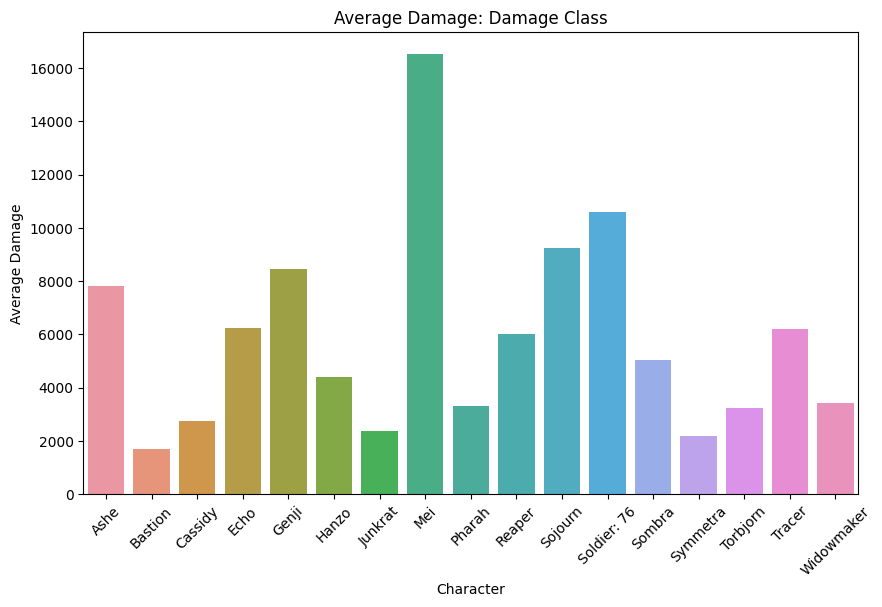

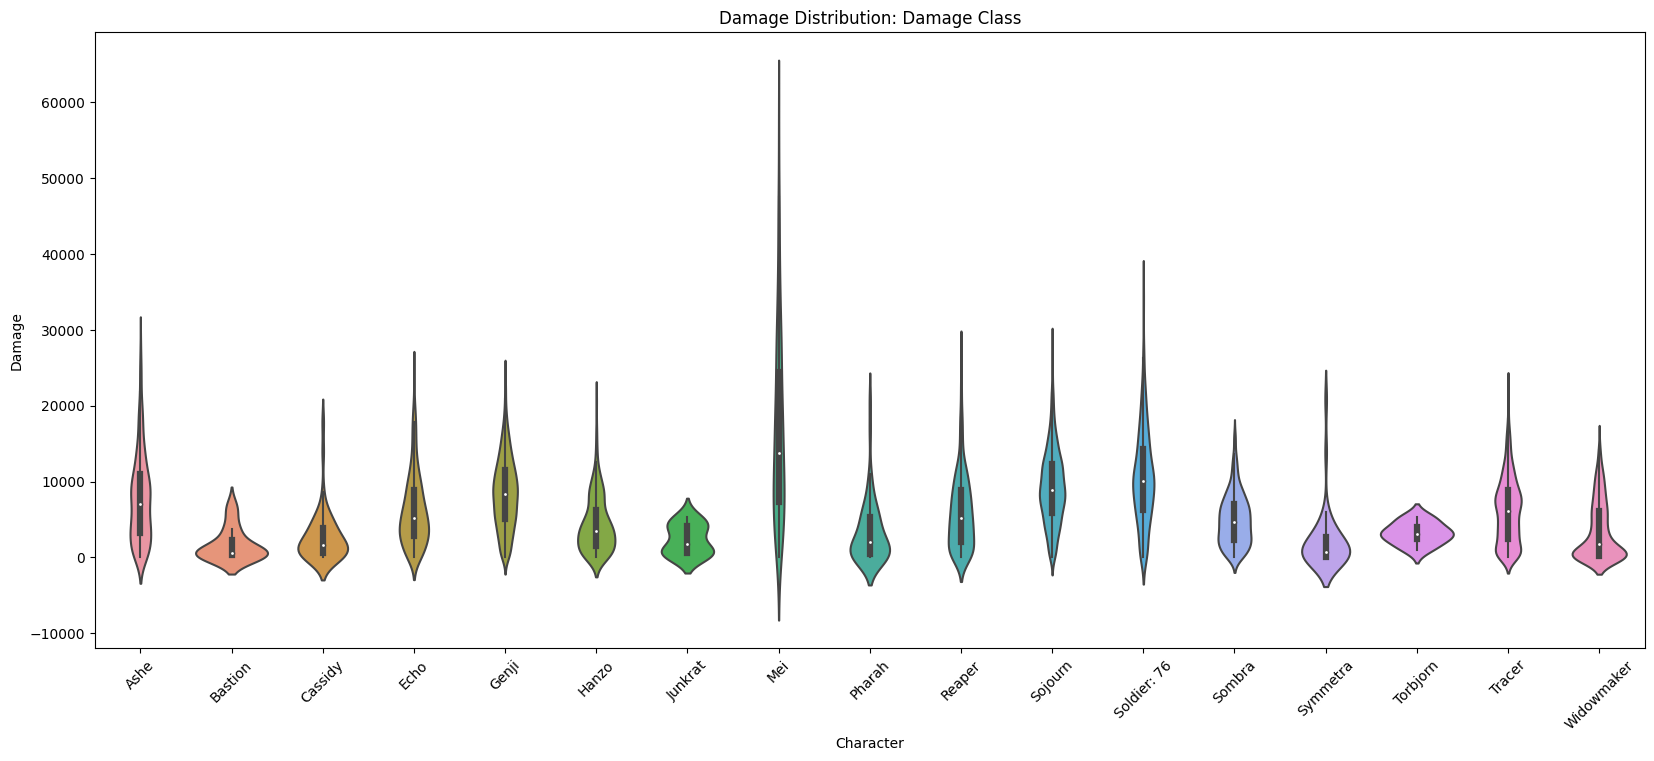

hero_name
Ashe           28260.517480
Bastion         6902.462974
Cassidy        17860.647020
Echo           24216.485750
Genji          23786.122300
Hanzo          20584.778260
Junkrat         5322.497842
Mei            57230.132710
Pharah         20661.639680
Reaper         26672.509890
Sojourn        27899.808080
Soldier: 76    35600.306070
Sombra         16147.260070
Symmetra       20836.009240
Torbjorn        5290.722490
Tracer         22295.660390
Widowmaker     15194.234520
Name: amount, dtype: float64

In [20]:
# plotting average damage done per hero for the damage class
damage_done = df_damage[df_damage["stat_name"] == "All Damage Done"]
y_axis = np.array(damage_done.groupby(["hero_name"])["amount"].mean()).reshape(-1)
plt.figure(figsize=(10,6))
plt.xticks(rotation=45)
ax = sns.barplot(data = damage_done, x = dps, y = y_axis)
ax.set(xlabel = "Character", ylabel = "Average Damage")
ax.set_title("Average Damage: Damage Class")
plt.show()

# we sort here so that when analyzing the bar graph and violin plots side by side, the colors and hero correspond
sorted_dam = damage_done.sort_values(by = ["hero_name"])
plt.figure(figsize=(20,8))
plt.xticks(rotation=45)
ax = sns.violinplot(data = sorted_dam, x = sorted_dam["hero_name"], y = sorted_dam["amount"])
ax.set(xlabel = "Character", ylabel = "Damage")
ax.set_title("Damage Distribution: Damage Class")
plt.show()

Using these two plots, there is a lot of information to digest. Based on pure average damage, Mei seems to be an obvious best candidate, with Bastion being the worst. Since we have been playing overwatch for a while, the idea of Mei being the best damage charcater came to us as a surprise. However, the violin plot seems to prove that she has many outliers since the violin for her is very tall and skinny. Bastion on the other hand did not come as a surprise. Bastion, Torbjorn, Junkrat, and Symmetra have always been considered bad characters, and the data seems to support that claim. In fact, Bastion has the lowest damage and the most bottom heavy violin, meaning his damage on average is very low and bottom skewed. Characters that we believe have always been good are Sojourn and Solider: 76. They have very normal distributions and decent average damage, meaning they are still very good picks.

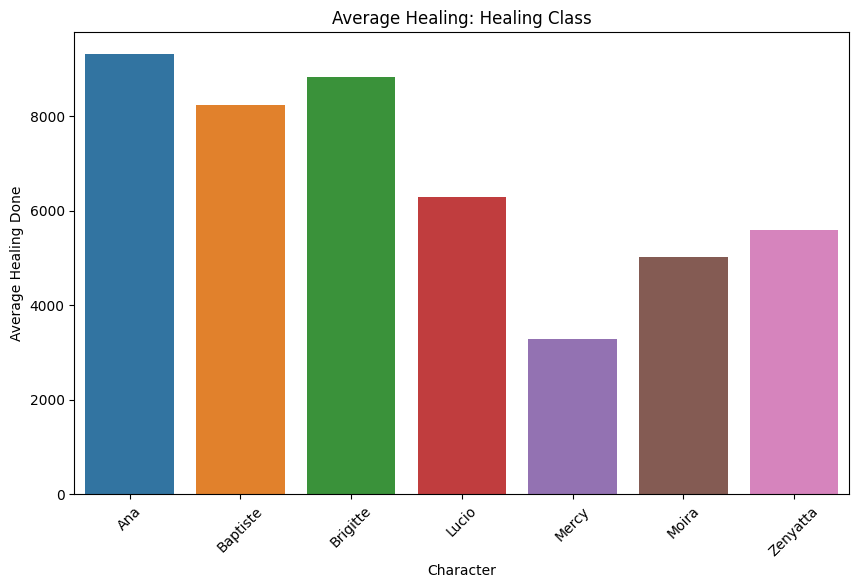

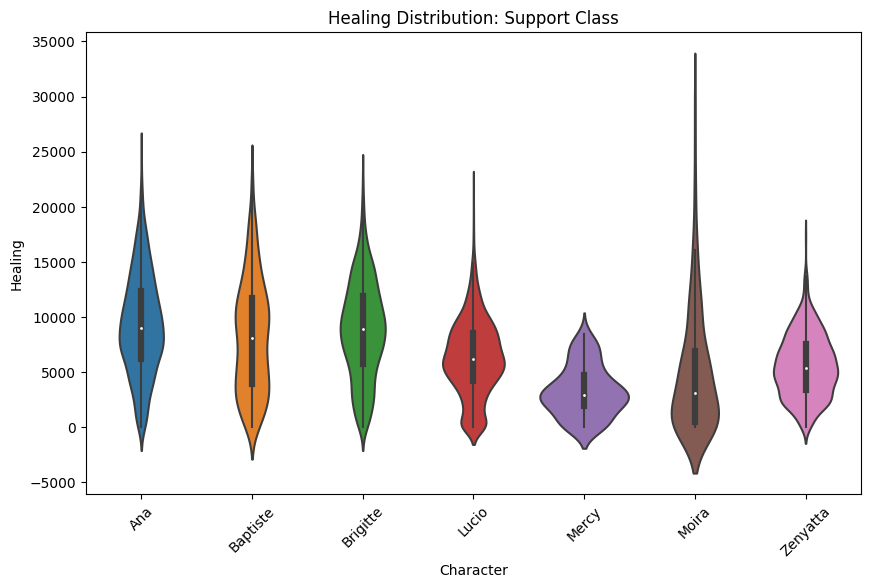

In [6]:
healing_done = df_healer[df_healer["stat_name"] == "Healing Done"]
y_axis = np.array(healing_done.groupby(["hero_name"])["amount"].mean()).reshape(-1)
plt.figure(figsize=(10,6))
plt.xticks(rotation=45)
# seaborn is the method of choice given its ease in diving variables 
ax = sns.barplot(data = healing_done, x = healers, y = y_axis)
ax.set(xlabel = "Character", ylabel = "Average Healing Done")
ax.set_title("Average Healing: Healing Class")
plt.show()

# sorting so that heros match one-to-one when compared with bar graph
sorted_heal = healing_done.sort_values(by = ["hero_name"])
plt.figure(figsize=(10,6))
plt.xticks(rotation=45)
ax = sns.violinplot(data = sorted_heal, x = sorted_heal["hero_name"], y = sorted_heal["amount"])
ax.set(xlabel = "Character", ylabel = "Healing")
ax.set_title("Healing Distribution: Support Class")
plt.show()

Overall, this data did not suprise us too much. Ana appears to be the best support, as she has the best average healing and a very normal, unimodal distribution. She has always been very relevant in the game of Overwatch and has been considered a must pick in professional play since her debut. In the higher ranks, Mercy seems to struggle. She has poor healing and a bottom skewed violin, indicating a poor performance throughout this tournament. Based on this data alone, it appears that Ana and Brigitte are favorable picks, while Mercy and Moira should be avoided.

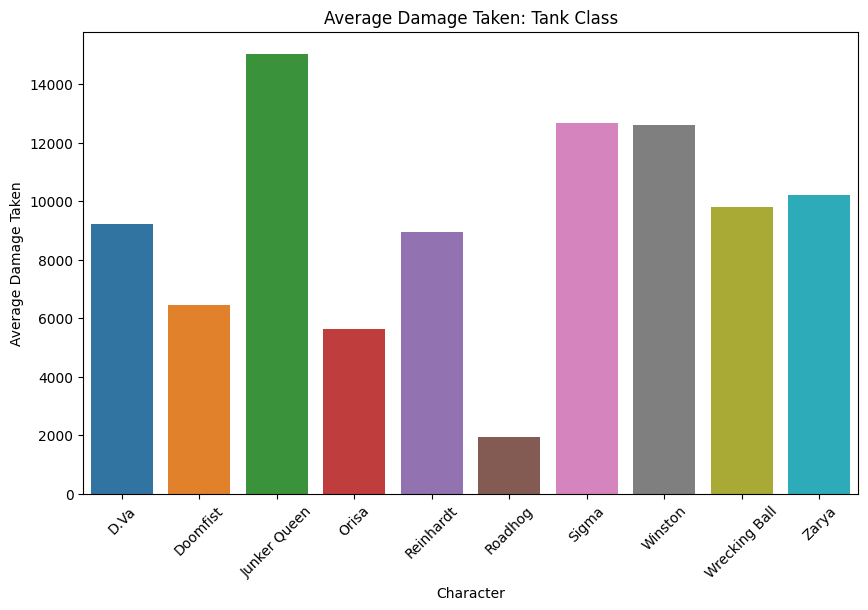

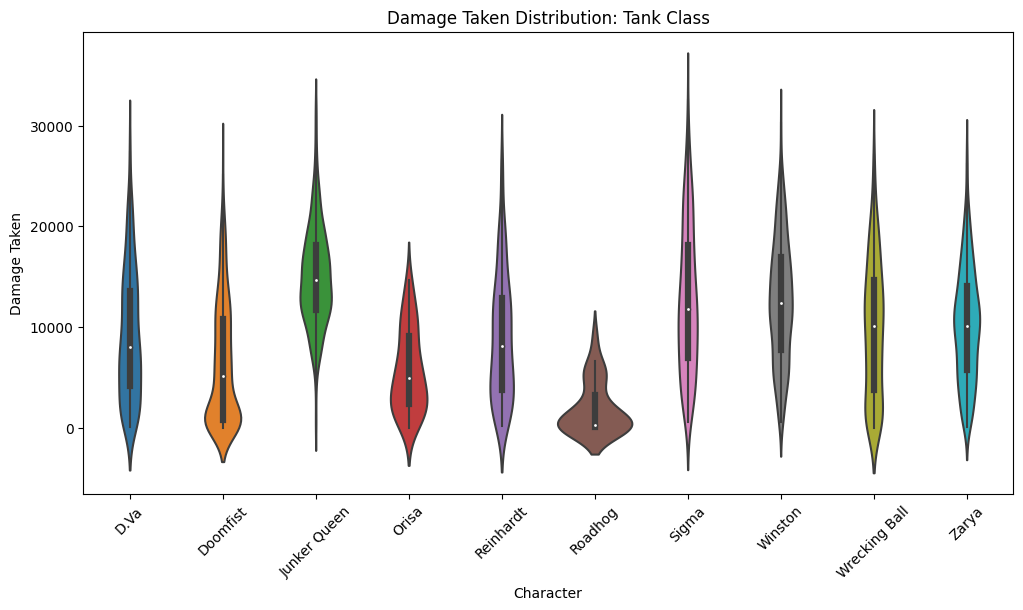

In [7]:
damage_taken = df_tank[df_tank["stat_name"] == "Damage Taken"]
# group by hero name and take the average damage for each unique hero
y_axis = np.array(damage_taken.groupby(["hero_name"])["amount"].mean()).reshape(-1)
plt.figure(figsize=(10,6))
plt.xticks(rotation=45)
ax = sns.barplot(data = damage_taken, x = tanks, y = y_axis)
ax.set(xlabel = "Character", ylabel = "Average Damage Taken")
ax.set_title("Average Damage Taken: Tank Class")
plt.show()

sorted_taken = damage_taken.sort_values(by = ["hero_name"])
# dont want the plots to be overbearring
plt.figure(figsize=(12,6))
plt.xticks(rotation=45)
ax = sns.violinplot(data = sorted_taken, x = sorted_taken["hero_name"], y = sorted_taken["amount"])
ax.set(xlabel = "Character", ylabel = "Damage Taken")
ax.set_title("Damage Taken Distribution: Tank Class")
plt.show()

Tanks are an interesting role within Overwatch. In every game, you are only allowed one tank, while you can have two damage and two supports per team. This makes the role unique in the sense that the player does not have anyone to fall back on, therefore putting a lot of pressure on the tank player. For tanks, it seems like there is an obvious meta within this data. Similar to Ana, Junker queen has the highest average damage taken, and the most normal, unimodal violin. She is a newer character, but seems as if she excelled within the 2022 Overwatch League. Sigma and Winston also appear as decent secondary picks. Roadhog appears to be the Bastion of this role. The poor average damage and heavily bottom skewed violin portray Roadhog as an extremely unfavorable pick. His data being poor makes sense. As explained earlier, you only get one tank, and Roadhogs only utility is a hook to pull people in. He does not have a shield or really any way to fully protect his team. Another poor pick that is indicated by this data is Doomfist. He is an interesting charcter because he used to be in the damage class, but Blizzard decided to swap him into the tank role. This data is indicating that Blizzard is struggling with this change, and needs to possibly look into tweaking him to be a more useful asset to his team. Orisa also appears to have low average damage taken, and a slightly bottom skewed violin, meaning that players should most likely avoid her.

# Finding Another Metric
When attempting to find the more favorable characters, we wanted to include other metrics as one can not draw conlusions based on one statistic alone. The first thing we decided to test was map type. Overwatch has four map types, control, hybrid, payload, and push. To analyze each character, we decided to use seaborn heatmaps. Heatmaps are perfect for these types of comparisons as they directly show which characters are favorable on each type. The coding for this was simple. We took each classes dataframe and sorted their respective statistic based on map type and hero name. As the key explains, the lighter the cell gets, the better a character is based on the metric discussed above. If a cell is pure white, it means that that character was never played within that specific map type.

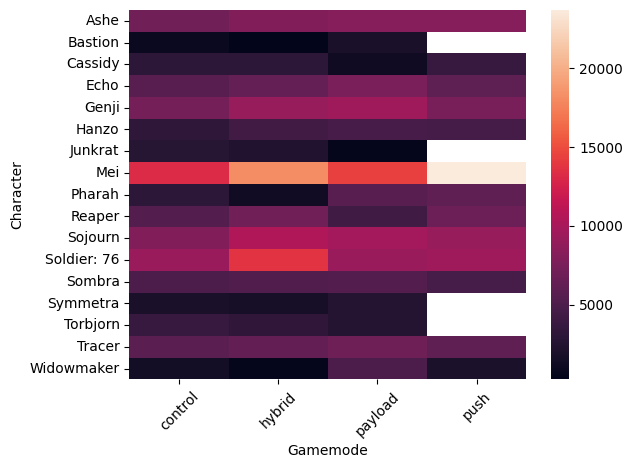

In [8]:
# unstack causes the data to be seperated properly and not jumbled
damage_done_mapType = damage_done.groupby(['map_type', 'hero_name'])["amount"].mean().unstack(level=0)
sns.heatmap(damage_done_mapType)
plt.xticks(rotation=45)
plt.xlabel("Gamemode")
plt.ylabel("Character")
plt.show()

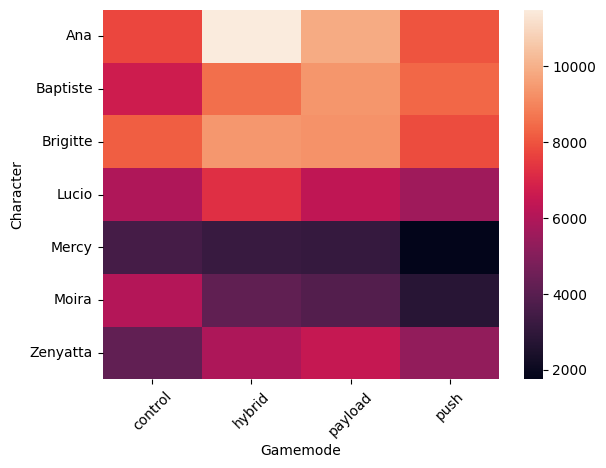

In [9]:
healing_done_mapType = healing_done.groupby(['map_type', 'hero_name'])["amount"].mean().unstack(level=0)
sns.heatmap(healing_done_mapType)
# rotating the x axis text so that its formatted cleaner
plt.xticks(rotation=45)
plt.xlabel("Gamemode")
plt.ylabel("Character")
plt.show()

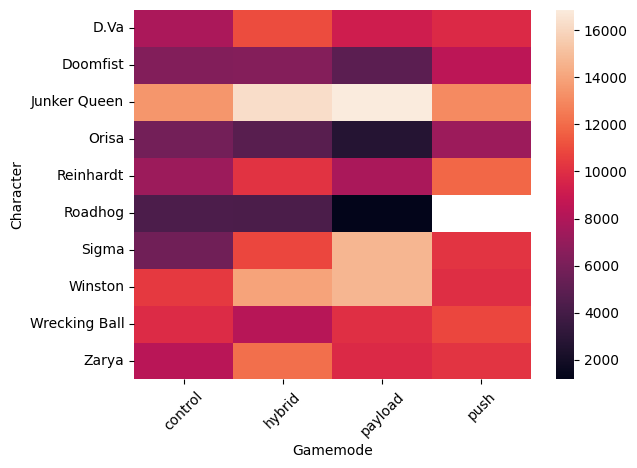

In [10]:
damage_taken_mapType = damage_taken.groupby(['map_type', 'hero_name'])["amount"].mean().unstack(level=0)
sns.heatmap(damage_taken_mapType)
plt.xticks(rotation=45)
plt.xlabel("Gamemode")
plt.ylabel("Character")
plt.show()

Utilizing these heatmaps, we decided that map type was not a very useful statistic. While there is some knowledge gained, the overall variance in character performace per map type seems to be too little to use within testing. One thing that really stood out was Mei's performace within the damage heatmap. While she performed well on each map type, she saw a major spike on push maps. She averages around 15,000 damage on control, hybrid, and payload maps while averaging over 20000 on push maps. While we chose to ignore this statistic, one could draw the conclusion that Mei is a very good pick on push maps specifically. Another interesting conclusion is the fact that push maps seem to have the least diversity in characters picks between the map types. Bastion, Junkrat, Symmetra, Torbjorn, and Roadhog were never played on push maps with the Overwatch League. While they were explained to be poor choices earlier, it is surprising to see that some characters were never chosen on push maps.

# More Exploration
After trying a metric that is distributed across all characters like map type, we decided to get more specific and test more class based statistics. We chose to examine eliminations for damage, deaths for support, and objective time for tanks. Eliminations makes sense for the damage class as while they are gaining damage throughout the game, they should also gain more eliminations. Choosing another metric for support was tough. It seems obvious to do healing done as that is the point of their main purpose, but what else do they do. After thinking, we decided to do deaths. We chose deaths because as a support, you should be the person on your team that is constantly alive and availible to keep your team in the fight at hand. As for tanks, we chose objective time. While tanking a bunch of damage, the tank on each team should also be holding the respective objective. Whether it be the cart on a push map or a point on a hybrid, the tank should stay in control of the objective at all times.

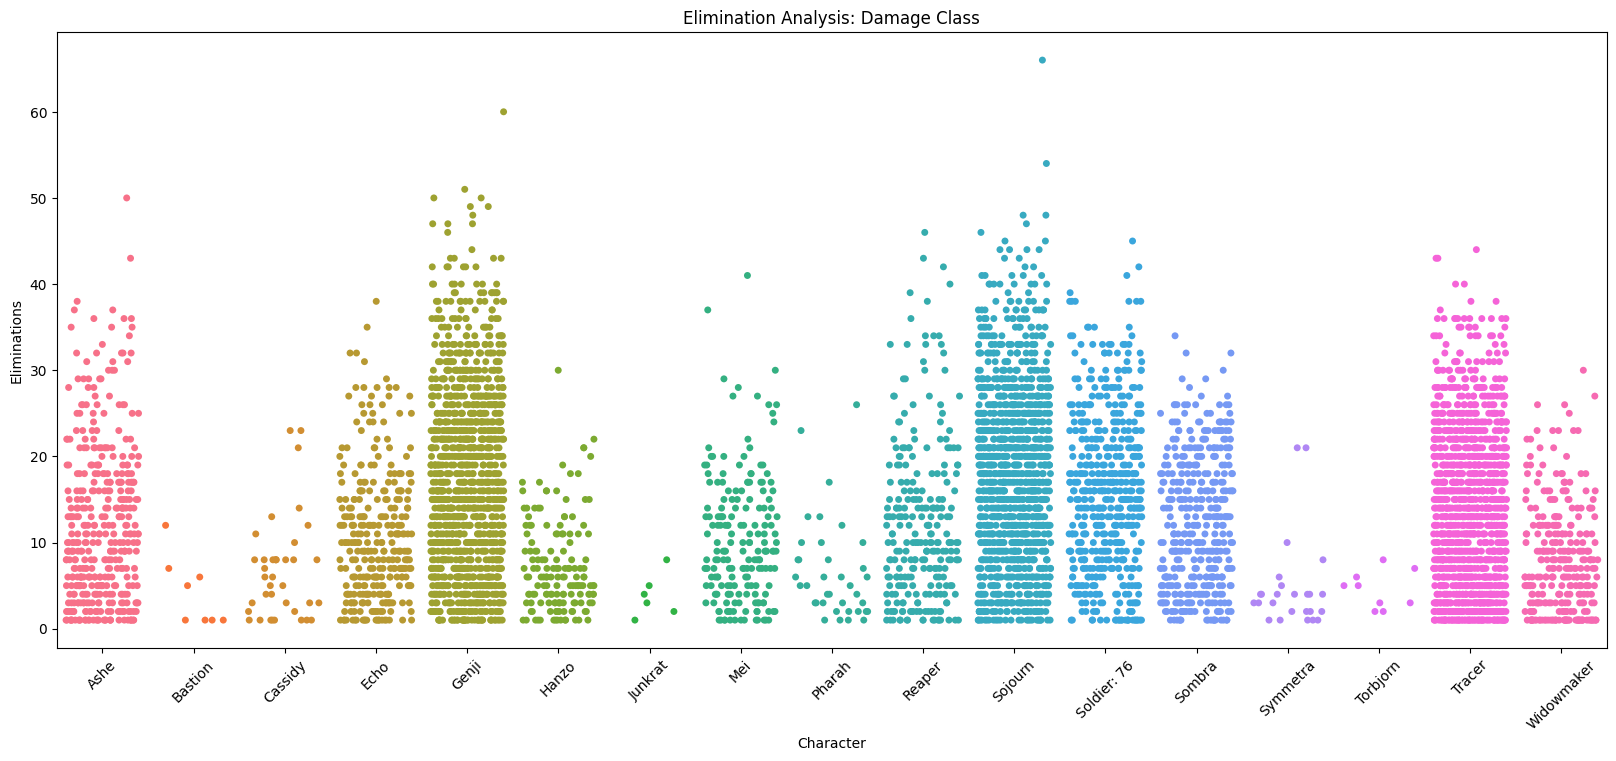

In [11]:
damage_elims = df_damage[df_damage["stat_name"] == "Eliminations"]
sorted_elims = damage_elims.sort_values(by = ["hero_name"])
plt.figure(figsize=(20,8))
plt.xticks(rotation=45)
# defining new type of plot to get different representation of distributions
ax = sns.stripplot(data = sorted_elims, x = sorted_elims["hero_name"], y = sorted_elims["amount"], hue = sorted_elims["hero_name"], legend = False, jitter = .4)
ax.set(xlabel = "Character", ylabel = "Eliminations")
ax.set_title("Elimination Analysis: Damage Class")
plt.show()

Instead of doing more bar and violin graphs, we found that a Seaborn Stripplot can reveal a lot about data. Analyzing this one, we can see which characters had the most elims, the distribution, and even the amount of data for each character based on the nuumber of dots. Taking a closer look at this, it seems as if it portrays similar statistics to the damage done charts explored above. Sojourn and Solider: 76 are still great picks with Genji proving to also be a solid pick. The biggest takeaway from this graph is Mei's data. We have explained how we did not expect Mei to have such a high impact on the game, and this chart more aligns with what we expected. While she is not the worst on the char, she has few dots, indicating she is not played often. Also, Sojourn, Solider: 76, and Genji all have much higher outliers than Mei. When analyzing the bad characters, all remains the same. Bastion, Junkrat, Symmetra, and Torbjorn have few games played, and within those games perform terribly. Overall we agree that elimiantions is a good statistic to look at performace as the data found resembles what was discovered in our previous findings.

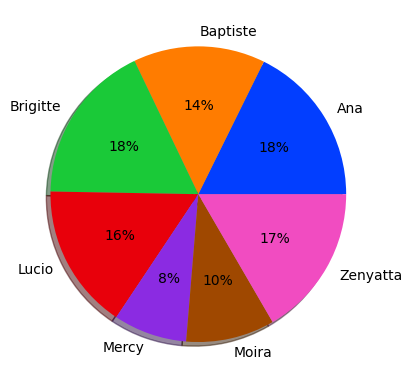

In [12]:
healing_deaths = df_healer[df_healer["stat_name"] == "Deaths"]
avg_deaths = np.array(healing_deaths.groupby(["hero_name"])["amount"].mean()).reshape(-1)
palette_color = sns.color_palette('bright')
  
# plotting data on chart
plt.pie(avg_deaths, labels=healers, colors=palette_color, autopct='%.0f%%', shadow = True)
  
# displaying chart
plt.show()

While we did want to show deaths on a Seaborn stripplot, the deaths statistic itself would not make sense. Deaths is different than our other metrics as it can only be a whole number. This would make the stripplot appear with only horizontal lines of dots at each number on the y axis. We decided that a pie chart would be good as it will show the percentage of deaths each character has when compared to the other characters. The deaths seem to be evenly distributed, in the sense that the percentages are between 8 and 18 percent inclusive. While Ana does have the most deaths on average, one could conclude that the prowess shown in raw healing makes up for it. Overall, it seems as if the support class is the most balanced class based on helaing done and average deaths.

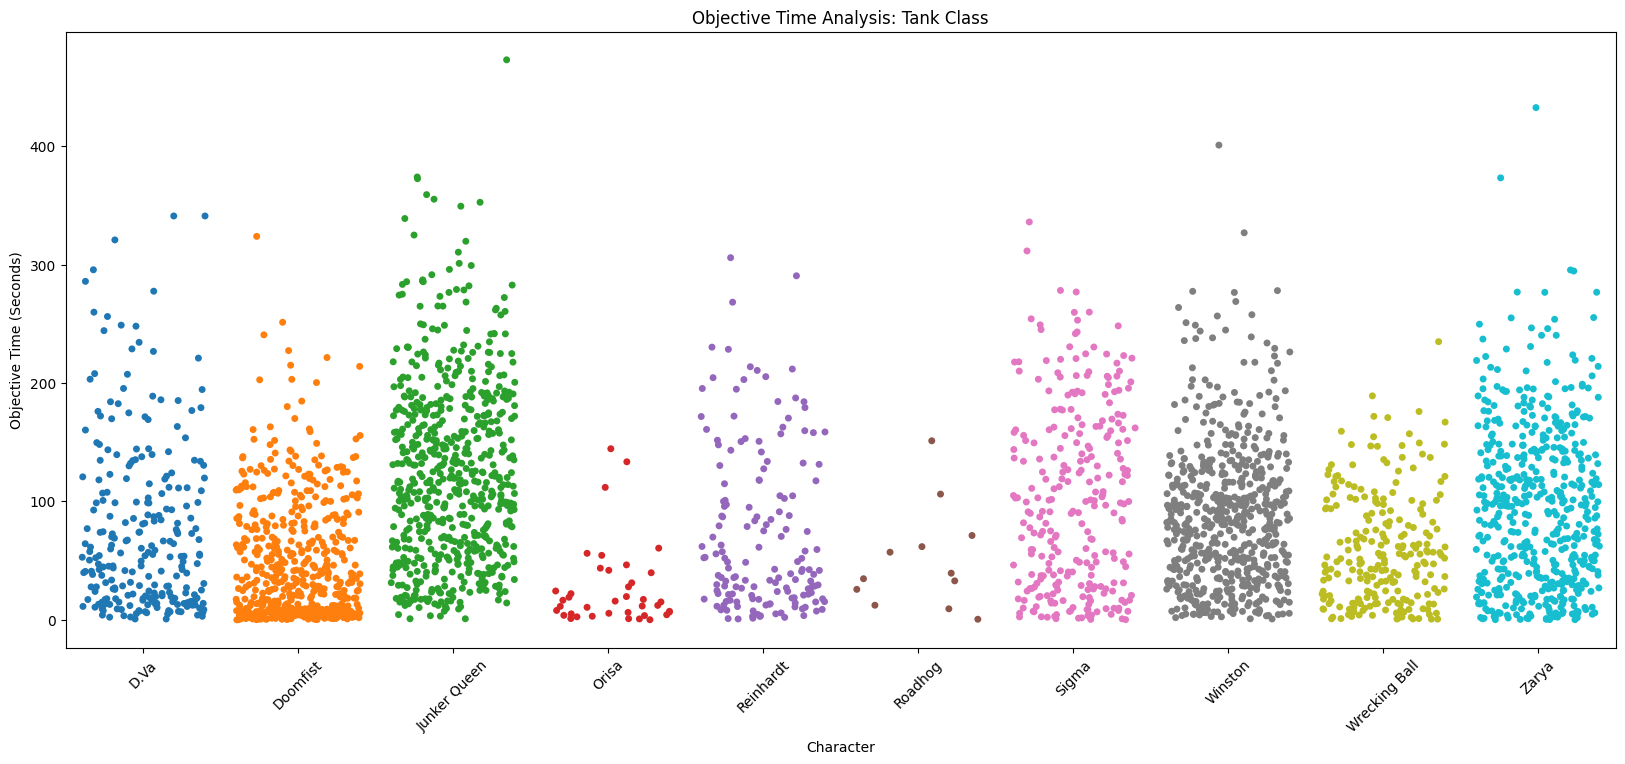

In [13]:
obj_time = df_tank[df_tank["stat_name"] == "Objective Time"]
sorted_time = obj_time.sort_values(by = ["hero_name"])
plt.figure(figsize=(20,8))
plt.xticks(rotation=45)
ax = sns.stripplot(data = sorted_time, x = sorted_time["hero_name"], y = sorted_time["amount"], hue = sorted_time["hero_name"], legend = False, jitter = .4)
ax.set(xlabel = "Character", ylabel = "Objective Time (Seconds)")
ax.set_title("Objective Time Analysis: Tank Class")
plt.show()

This chart seems to have similar results to the damage taken statistics. Overall, Junker Queen is dominant. She has many dots, showing she is picked often. Her main cluster of data points also is higher than other characters, indicating that on average, she reamins on point longer than other thanks. Something new that came from this graph is statistics about Zarya. Zarya's main cluster is very similar to Junker Queen's cluster which proves that she is a very strong tank in the sense of holding a point. This does not come as a surprise as she has a bubble that makes her invinvible for a short period of time, causing her to be able to maintain a point far longer than other tanks. On the other hand, the bad characters remain constant. Roadhog and Orisa are rarely picked and have really bad performace realting to objectives. While the graph proves that Doomfist has been picked frequently, it also shows that he is very rarely holding an objective, shown by all of his points being bottom skewed. Overall, it appears as if objective time would be a good metric as it mostly matches our fidnings from earlier.

## Hypothesis Testing

**Null Hypothesis:** For all three hero classes (damage, support, tank), there are no variables that have an effect on the output of how well each class of hero performs. Class performance is due to chance.

After analyzing how different statistics were related in previous parts, we will now use linear regression in order to see if we can draw significant conclusions about relationships within our data. Starting with the damage class, we aim to see if we can produce a linear regression model that accurately predicts damage done given hero name and eliminations per game.

Our models are trained via holdout validation: splitting the data between a training set and a test set. SKLearn comes in handy for the actual regression analysis of this specific model.

### Predicting Damage
The first model aims to predict how much damage a hero from the damage class deals using hero name and eliminations as the predictors.

In [14]:
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import accuracy_score
from sklearn import metrics

# necessary so that our model can apply the regressioon with numerical values
characterEncoding = {
    'Lucio':0, 'Genji':1, 'Tracer':2, 'Doomfist':3, 'Winston':4, 'Reaper':5, 'Soldier: 76':6,
    'Ana':7, 'Zarya':8, 'Echo':9, 'Widowmaker':10, 'Ashe':11, 'D.Va':12, 'Sigma':13, 'Baptiste':14,
    'Zenyatta':15, 'Symmetra':16, 'Moira':17, 'Pharah':18, 'Sombra':19, 'Brigitte':20, 'Mercy':21, 'Mei':22,
    'Reinhardt':23, 'Roadhog':24, 'Hanzo':25, 'Cassidy':26, 'Sojourn':27, 'Junkrat':28, 'Bastion':29,
    'Wrecking Ball':30, 'Torbjorn':31, 'Orisa':32, 'Junker Queen':33
}


# wrangling data to seperate predictors and damage
merged_damage = damage_elims.merge(damage_done, on=["esports_match_id", "hero_name", "player_name", "map_name"], how = "inner")
merged_damage.drop(["map_name","esports_match_id", "tournament_title_x", "team_name_x", "map_type_x","player_name","stat_name_x","class_x","tournament_title_y","map_type_y", "team_name_y","stat_name_y","class_y"], axis = 1, inplace=True)
merged_damage = merged_damage.rename({'amount_x': 'eliminations', 'amount_y': 'damage'}, axis=1)


merged_damage['hero_name'] = merged_damage['hero_name'].map(characterEncoding)


X = merged_damage[['hero_name','eliminations']]
y = merged_damage['damage']
# training with 75% of data
# holdout validation
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)
model = LinearRegression()
model.fit(X_train, y_train)
predictions = model.predict(X_test)

meanAbsErr = metrics.mean_absolute_error(y_test, predictions)
r2score = metrics.r2_score(y_test, predictions)

print("----------Model Performance-----------")
print("--------------------------------------")
print('Mean absolute error: {}'.format(meanAbsErr))
print('R2 score: {}'.format(r2score))
print("--------------------------------------")# 

----------Model Performance-----------
--------------------------------------
Mean absolute error: 2645.6190107658012
R2 score: 0.5011283187252658
--------------------------------------


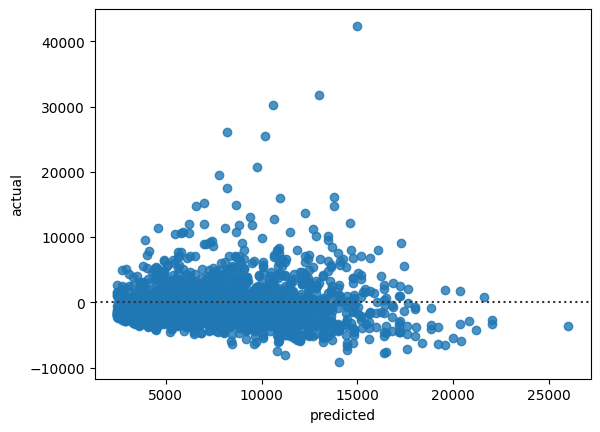

In [15]:
residuals_data = pd.DataFrame(list(zip(predictions, y_test)), columns =['predicted', 'actual'])
sns.residplot(x='predicted', y='actual', data=residuals_data)
plt.show()

The residuals seem to be mainly distributed around the residual line of y = 0, but with some outliers.

### Predicting Healing
The second model aims to predict how much healing a hero from the support class will dish out using hero name and the amount of deaths as the predictors.

In [16]:
merged_support = healing_done.merge(healing_deaths, on=["esports_match_id", "hero_name", "player_name", "map_name"], how = "inner")
merged_support.drop(["map_name","esports_match_id", "tournament_title_x", "team_name_x", "map_type_x","player_name","stat_name_x","class_x","tournament_title_y","map_type_y", "team_name_y","stat_name_y","class_y"], axis = 1, inplace=True)
merged_support = merged_support.rename({'amount_x': 'healing', 'amount_y': 'deaths'}, axis=1)


merged_support['hero_name'] = merged_support['hero_name'].map(characterEncoding)

# defining new metrics 
X = merged_support[['hero_name','deaths']]
y = merged_support['healing']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.21, random_state=0)
model = LinearRegression()
model.fit(X_train, y_train)
predictions = model.predict(X_test)
# determining how accurate our model is
meanAbsErr = metrics.mean_absolute_error(y_test, predictions)
r2score = metrics.r2_score(y_test, predictions)

print("----------Model Performance-----------")
print("--------------------------------------")
print('Mean absolute error: {}'.format(meanAbsErr))
print('R2 score: {}'.format(r2score))
print("--------------------------------------")

----------Model Performance-----------
--------------------------------------
Mean absolute error: 2779.3466202627496
R2 score: 0.34819356149988423
--------------------------------------


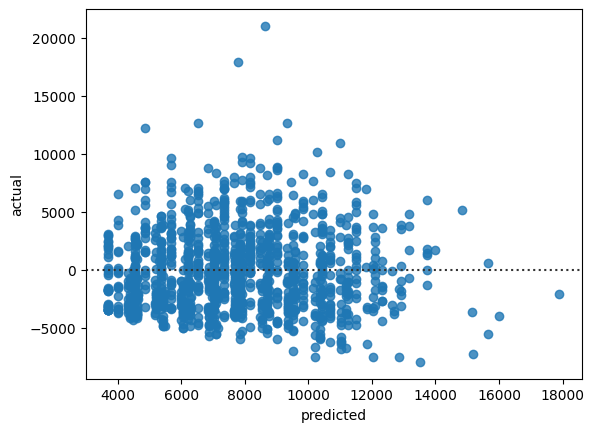

In [17]:
residuals_data = pd.DataFrame(list(zip(predictions, y_test)), columns =['predicted', 'actual'])
sns.residplot(x='predicted', y='actual', data=residuals_data)
plt.show()

The residuals have a higher variance as seen with how they are less evenly distributed around the residual line. Ideally, all the residuals would be extremely close to this line. 

### Predicting Damage Taken
The third model aims to predict how much damage taken a hero from the tank class will take using hero name and the amount of time spent on the objective as the predictors.

In [18]:
merged_tank = damage_taken.merge(obj_time, on=["esports_match_id", "hero_name", "player_name", "map_name"], how = "inner")
merged_tank.drop(["map_name","esports_match_id", "tournament_title_x", "team_name_x", "map_type_x","player_name","stat_name_x","class_x","tournament_title_y","map_type_y", "team_name_y","stat_name_y","class_y"], axis = 1, inplace=True)
merged_tank = merged_tank.rename({'amount_x': 'damage_taken', 'amount_y': 'objective_time'}, axis=1)


merged_tank['hero_name'] = merged_tank['hero_name'].map(characterEncoding)


X = merged_tank[['hero_name','objective_time']]
y = merged_tank['damage_taken']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=0)
model = LinearRegression()
model.fit(X_train, y_train)
predictions = model.predict(X_test)

meanAbsErr = metrics.mean_absolute_error(y_test, predictions)
r2score = metrics.r2_score(y_test, predictions)

print("----------Model Performance-----------")
print("--------------------------------------")
print('Mean absolute error: {}'.format(meanAbsErr))
print('R2 score: {}'.format(r2score))
print("--------------------------------------")

----------Model Performance-----------
--------------------------------------
Mean absolute error: 3603.943599551607
R2 score: 0.5215165676027731
--------------------------------------


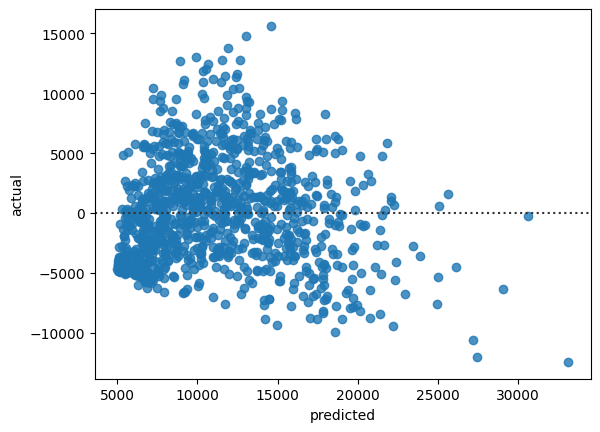

In [19]:
residuals_data = pd.DataFrame(list(zip(predictions, y_test)), columns =['predicted', 'actual'])
sns.residplot(x='predicted', y='actual', data=residuals_data)
plt.show()

The three seperate models are being tested on their performance with the metrics of mean absolute error and R-Squared. Both of these are used because again we are using regression models, so we have to choose metrics that correspond with our model type. Mean absolute error is used because we want our performance evaluations to be less sensitive to outliers, as when observing our data we noted the present of some outliers. R-Squared tells us how close the data is to the found regression line and tells us the strength of the relationship between our linear regression model and the dependent variables of damage, healing, and damage taken.

## Insights Gained

We reject our Null Hypothesis. We reject for the following reasons: mediocre mean absolute error value's and poor R-Squared values. Observe that for all three classes, none of the R-Squared values broke 60%, meaning it would be hard to make the claim that the indepedent variables we defined had a strong relationship with our dependent variables. The mean absolute error value's stayed around 3,000 for our three models and this was almost expected given the nature of our data itself: our dependent variables (damage. healing, damage taken) tended to be in the thousands to tens of thousands. 

When going about the "Exploratory data analysis" stage of our project we seemed to see strong correlations in data. For example, we saw the hero Ana has a normal distribution with a high mean when looking at the distribution of the healing she provided. So, we thought it was certainly possible that the hero you chose per class could have a strong impact on performance. On the flip side, when looking at the heat maps to decide if the map type a hero plays on affects performance, we saw no strong relationship and thus decided not to include it as one of the metrics in our regression model. 

With this in mind, it is important to note that it is certainly possible one could define metrics that have a strong relationship with class performance and prove this with a regression model. However, if this is true, then in our case we were not able to correctly identify these metrics. To provide almost somewhat of a counter-claim, it is possible that in the Overwatch League it is truly balanced in the sense that there is no combination of choices a player can make that will give them a true competetive advantage.